## Ch 04. 추측통계의 기본

In [4]:
# 추측통계: 일부 데이터로부터 전체의 통계적 성질을 추측하는 방식
# 2 ~ 3장의 내용은 기술통계에 해당됨

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('data/ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64)

### 1. 모집단과 표본

In [16]:
# np.random.choice로 무작위추출 하기
np.random.choice([1,2,3], 3)

array([2, 2, 1])

In [17]:
# np.random.choice의 기본값은
# 복원추출
np.random.choice([1,2,3], 3, replace=True)

array([1, 2, 1])

In [19]:
# np.random.choice의 replace를 False로 설정하면
# 비복원추출
np.random.choice([1,2,3], 3, replace=False)

array([1, 2, 3])

In [21]:
# seed: 난수
# 난수 seed를 정해두면 매번 동일한 난수를 얻을 수 있다.
np.random.seed(0)
np.random.choice([1,2,3], 3)

array([1, 2, 1])

In [24]:
np.random.seed(1)
np.random.choice([1,2,3], 3)

array([2, 1, 1])

In [26]:
# 무작위추출에 seed 지정하고 표본크기 20으로 복원추출
np.random.seed(0)
sample = np.random.choice(scores, 20)
# 표본평균 계산하기
sample.mean()

70.4

In [27]:
# 모평균 계산하기 ( <- 전교생 데이터 )
scores.mean()

69.53

In [28]:
# 무작위추출은 실행할 때마다 결과가 달라지기 때문에
# 얻어지는 표본평균도 매번 달라진다.

In [47]:
# 무작위추출과 그에 따른 표본평균 계산을 몇 번 실행해보기
for i in range(5):
    sample = np.random.choice(scores, 20)
    print(f'{i+1}번째 무작위추출로 얻은 표본평균', sample.mean())

1번째 무작위추출로 얻은 표본평균 71.15
2번째 무작위추출로 얻은 표본평균 68.85
3번째 무작위추출로 얻은 표본평균 66.35
4번째 무작위추출로 얻은 표본평균 68.1
5번째 무작위추출로 얻은 표본평균 70.05


### 2. 확률 모형

In [48]:
dice = [1,2,3,4,5,6]
prob = [1/21,2/21,3/21,4/21,5/21,6/21]

In [49]:
num_trial = 100
sample = np.random.choice(dice, num_trial, p=prob)
sample

array([4, 6, 6, 6, 5, 4, 5, 6, 2, 6, 1, 6, 6, 2, 5, 5, 3, 3, 6, 5, 6, 6,
       6, 2, 6, 3, 4, 6, 3, 5, 3, 2, 2, 4, 1, 4, 5, 4, 2, 2, 3, 3, 6, 3,
       6, 5, 5, 5, 6, 4, 6, 5, 4, 6, 5, 2, 4, 6, 5, 6, 3, 6, 4, 5, 6, 6,
       6, 4, 6, 5, 4, 1, 6, 5, 6, 6, 6, 4, 6, 5, 4, 5, 1, 2, 4, 6, 2, 4,
       2, 4, 4, 6, 6, 4, 1, 6, 5, 3, 6, 2])

In [52]:
freq, _ = np.histogram(sample, bins=6, range=(1,7))

In [54]:
pd.DataFrame({'frequency':freq, 
              'relative frequency':freq/num_trial}, 
             index = pd.Index(np.arange(1,7), name='dice'))

,frequency,relative frequency
dice,,
1,5,0.05
2,12,0.12
3,10,0.10
4,19,0.19
5,19,0.19
6,35,0.35


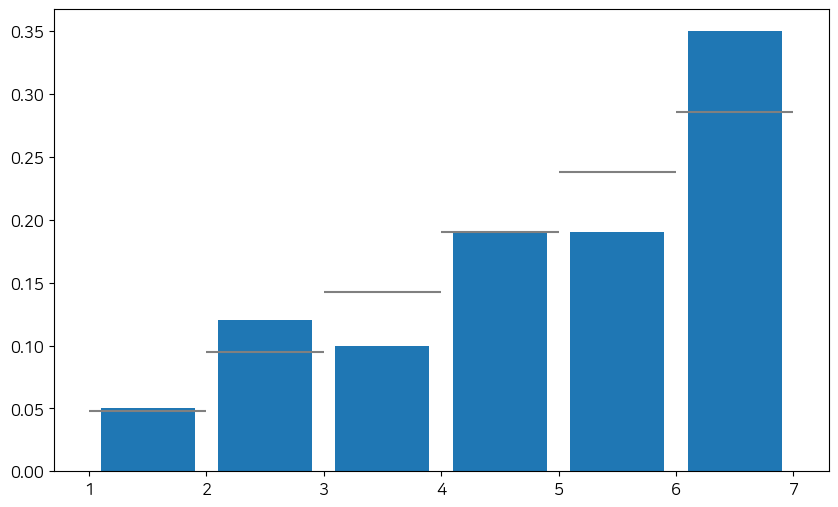

In [57]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample,bins=6,range=(1,7),density=True,rwidth=0.8)
ax.hlines(prob, np.arange(1,7), np.arange(2,8), colors='gray')

In [71]:
num_trial = 10000
sample = np.random.choice(dice, num_trial, p=prob)
sample

array([5, 6, 3, ..., 4, 4, 5])

In [72]:
freq, _ = np.histogram(sample, bins=6, range=(1,7))

In [73]:
pd.DataFrame({'frequency':freq, 
              'relative frequency':freq/num_trial}, 
             index = pd.Index(np.arange(1,7), name='dice'))

,frequency,relative frequency
dice,,
1,476,0.0476
2,980,0.0980
3,1456,0.1456
4,1890,0.1890
5,2350,0.2350
6,2848,0.2848


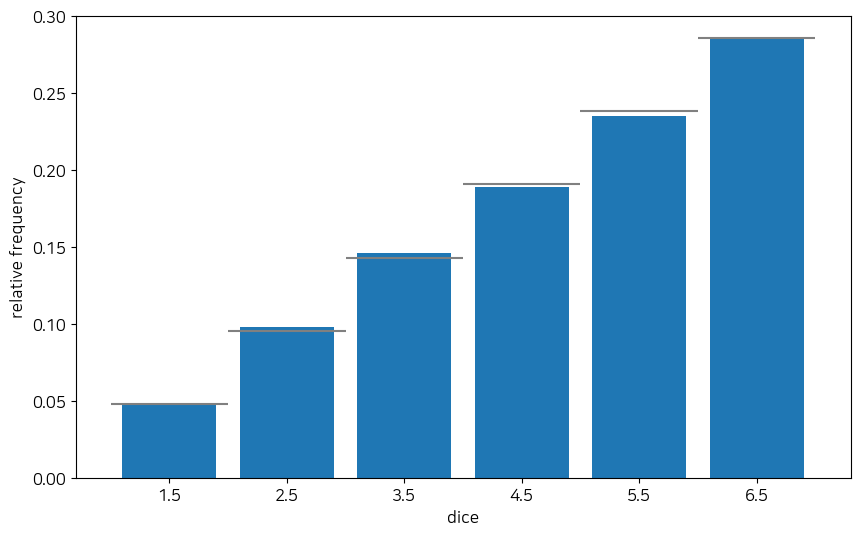

In [74]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample,bins=6,range=(1,7),density=True,rwidth=0.8)
ax.hlines(prob, np.arange(1,7), np.arange(2,8), colors='gray')
ax.set_xticks(np.linspace(1.5,6.5,6))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

In [75]:
num_trial = 1000000
sample = np.random.choice(dice, num_trial, p=prob)
sample

array([5, 2, 4, ..., 1, 3, 2])

In [76]:
freq, _ = np.histogram(sample, bins=6, range=(1,7))

In [77]:
pd.DataFrame({'frequency':freq, 
              'relative frequency':freq/num_trial}, 
             index = pd.Index(np.arange(1,7), name='dice'))

,frequency,relative frequency
dice,,
1,47963,0.047963
2,94958,0.094958
3,143064,0.143064
4,190201,0.190201
5,237725,0.237725
6,286089,0.286089


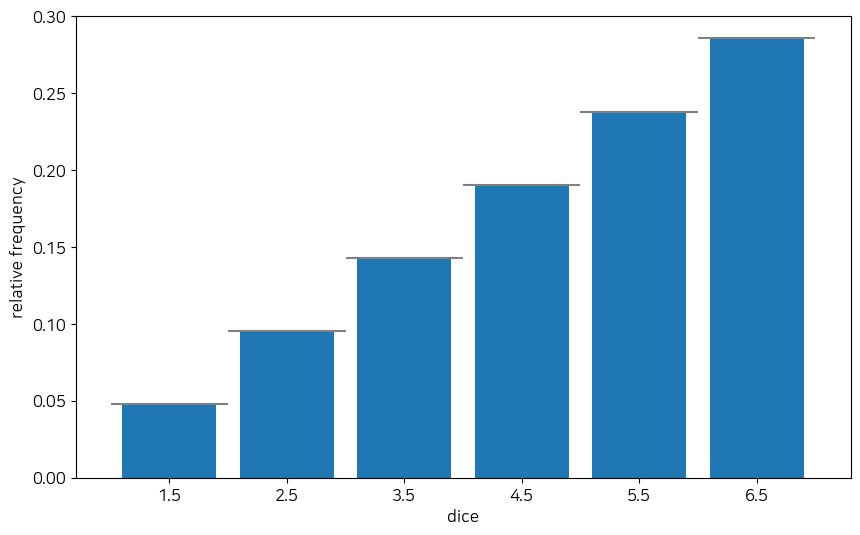

In [78]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample,bins=6,range=(1,7),density=True,rwidth=0.8)
ax.hlines(prob, np.arange(1,7), np.arange(2,8), colors='gray')
ax.set_xticks(np.linspace(1.5,6.5,6))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

### 3. 추측통계의 확률

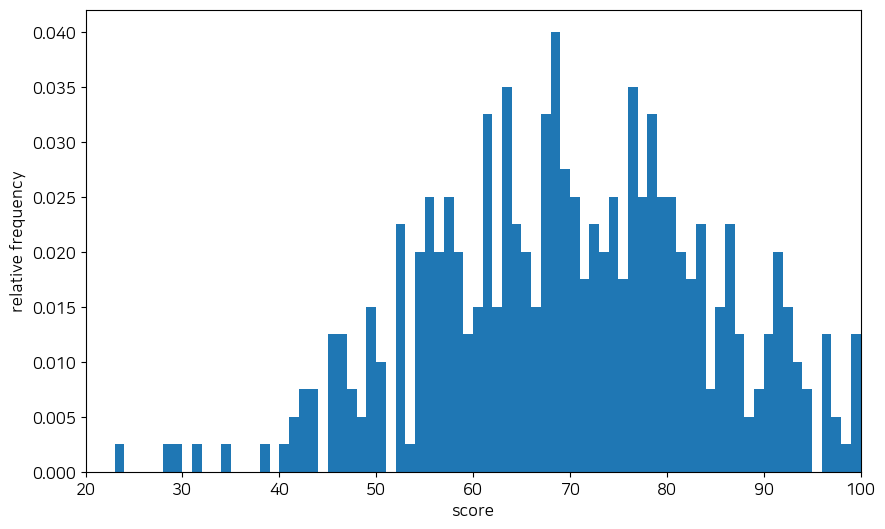

In [101]:
# 히스토그램 그리기
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0,100), density=True)
ax.set_xlim(20,100)
ax.set_ylim(0,0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

In [102]:
# 상대도수(re;ative frequency): 해당 점수를 얻는 확률에 대응한다.

In [82]:
np.random.choice(scores)

66

In [103]:
# 무작위추출에서 표본의 크기가 커지면 표본 데이터의 상대도수는 실제 확률분포에 가까워진다.

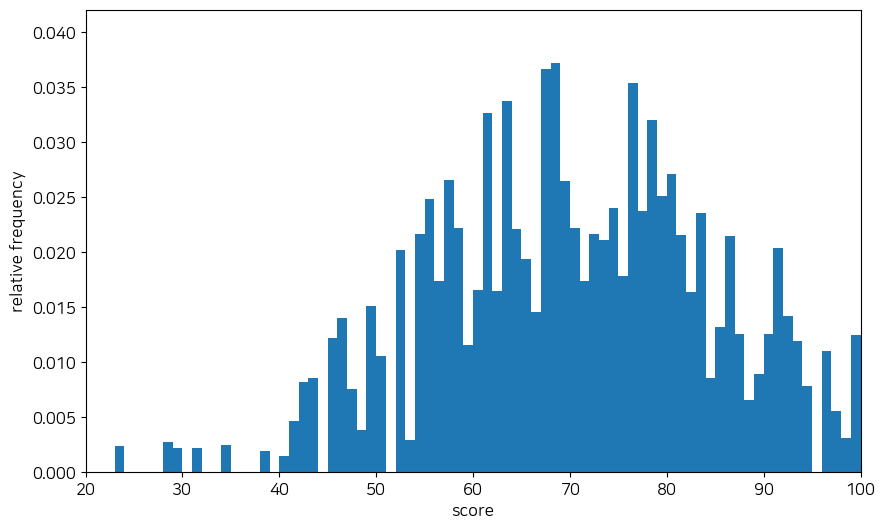

In [84]:
sample = np.random.choice(scores,10000)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
# scores -> sample
ax.hist(sample, bins=100, range=(0,100), density=True)
ax.set_xlim(20,100)
ax.set_ylim(0,0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

In [104]:
# 샘플 사이즈를 크게 하니까
# 히스토그램이 실제 점수 분포와 매우 가까운 형태로 나타나는 것을 확인할 수 있다.

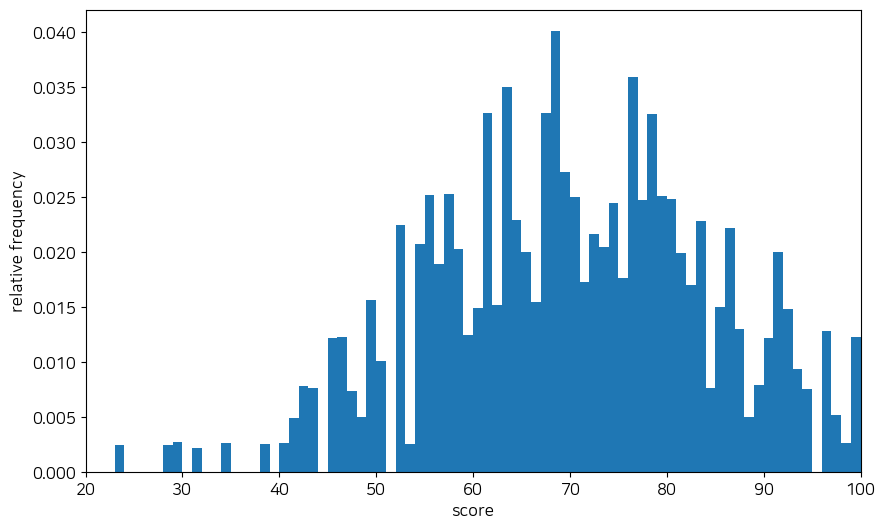

In [105]:
sample = np.random.choice(scores,100000)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
# scores -> sample
ax.hist(sample, bins=100, range=(0,100), density=True)
ax.set_xlim(20,100)
ax.set_ylim(0,0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

In [106]:
# 표본평균으로 히스토그램 그리기

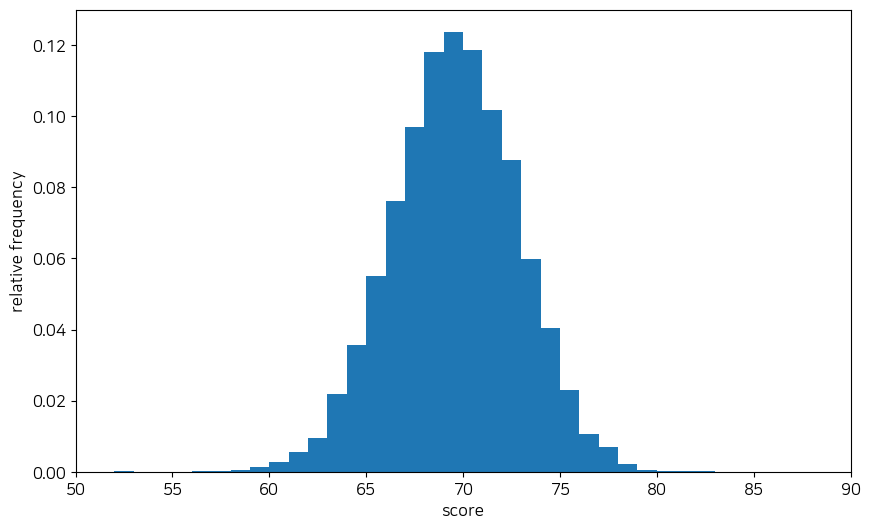

In [107]:
sample_means = [np.random.choice(scores,20).mean() for _ in range(10000)]
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
# scores -> sample -> sample_means
ax.hist(sample_means, bins=100, range=(0,100), density=True)
# 그래프의 범위에 맞게 xlim, ylim 숫자 적당히 조절하기
ax.set_xlim(50,90)
ax.set_ylim(0,0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

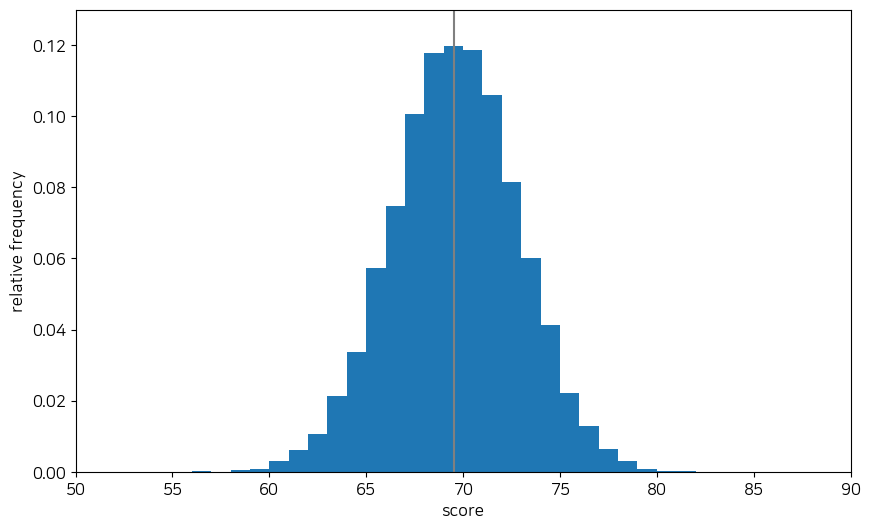

In [108]:
sample_means = [np.random.choice(scores,20).mean() for _ in range(10000)]
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
# scores -> sample -> sample_means
ax.hist(sample_means, bins=100, range=(0,100), density=True)

# 모평균을 세로선으로 표시하기
ax.vlines(np.mean(scores),0,1,'gray')

# 그래프의 범위에 맞게 xlim, ylim 숫자 적당히 조절하기
ax.set_xlim(50,90)
ax.set_ylim(0,0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()